### Importação dos dados



In [83]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [84]:
# Somando o preço das vendas de cada loja
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# Faturamento por loja
print(f"Loja 1: R${faturamento_loja1:.2f}")
print(f"Loja 2: R${faturamento_loja2:.2f}")
print(f"Loja 3: R${faturamento_loja3:.2f}")
print(f"Loja 4: R${faturamento_loja4:.2f}")

# Faturamento total
faturamento_total = faturamento_loja1 + faturamento_loja2 + faturamento_loja3 + faturamento_loja4
print(f"\nFaturamento total de todas as lojas: R${faturamento_total:.2f}")

Loja 1: R$1534509.12
Loja 2: R$1488459.06
Loja 3: R$1464025.03
Loja 4: R$1384497.58

Faturamento total de todas as lojas: R$5871490.79


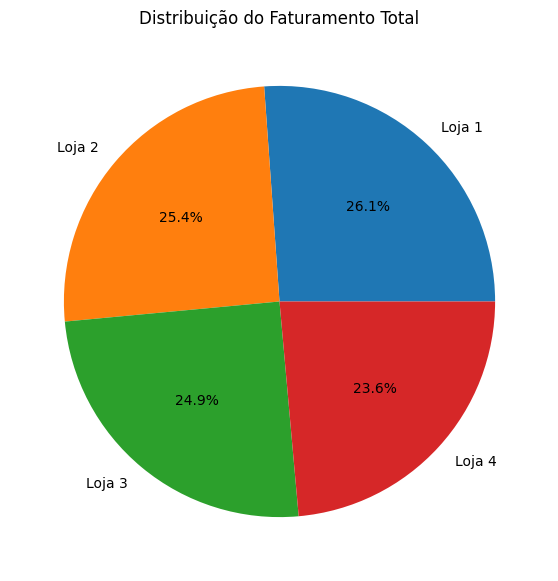

In [85]:
import matplotlib.pyplot as plt

# Gráfico de Pizza
plt.figure(figsize=(7, 7))
plt.pie(
    [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4],
    labels=['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    autopct='%1.1f%%'
)
plt.title('Distribuição do Faturamento Total')
plt.show()

# 2. Vendas por Categoria


In [86]:
# Vendas por categoria
def vendas_por_categoria(loja, numero):
    vendas = loja.groupby('Categoria do Produto')['Preço'].sum()
    print(f"\nVendas por categoria na Loja {numero}:")
    print(vendas)
    return vendas  # mantém o retorno para montar a tabela

# Tabela
tabela_categorias = pd.DataFrame({
    'Loja 1': vendas_por_categoria(loja, 1),
    'Loja 2': vendas_por_categoria(loja2, 2),
    'Loja 3': vendas_por_categoria(loja3, 3),
    'Loja 4': vendas_por_categoria(loja4, 4)
})


Vendas por categoria na Loja 1:
Categoria do Produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: Preço, dtype: float64

Vendas por categoria na Loja 2:
Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64

Vendas por categoria na Loja 3:
Categoria do Produto
brinquedos                25869.20
eletrodomesticos         438984.89
eletronicos              547699.92
esporte e lazer           47456.10
instrumentos musicais    103174.45
livros                    12664.70
moveis      

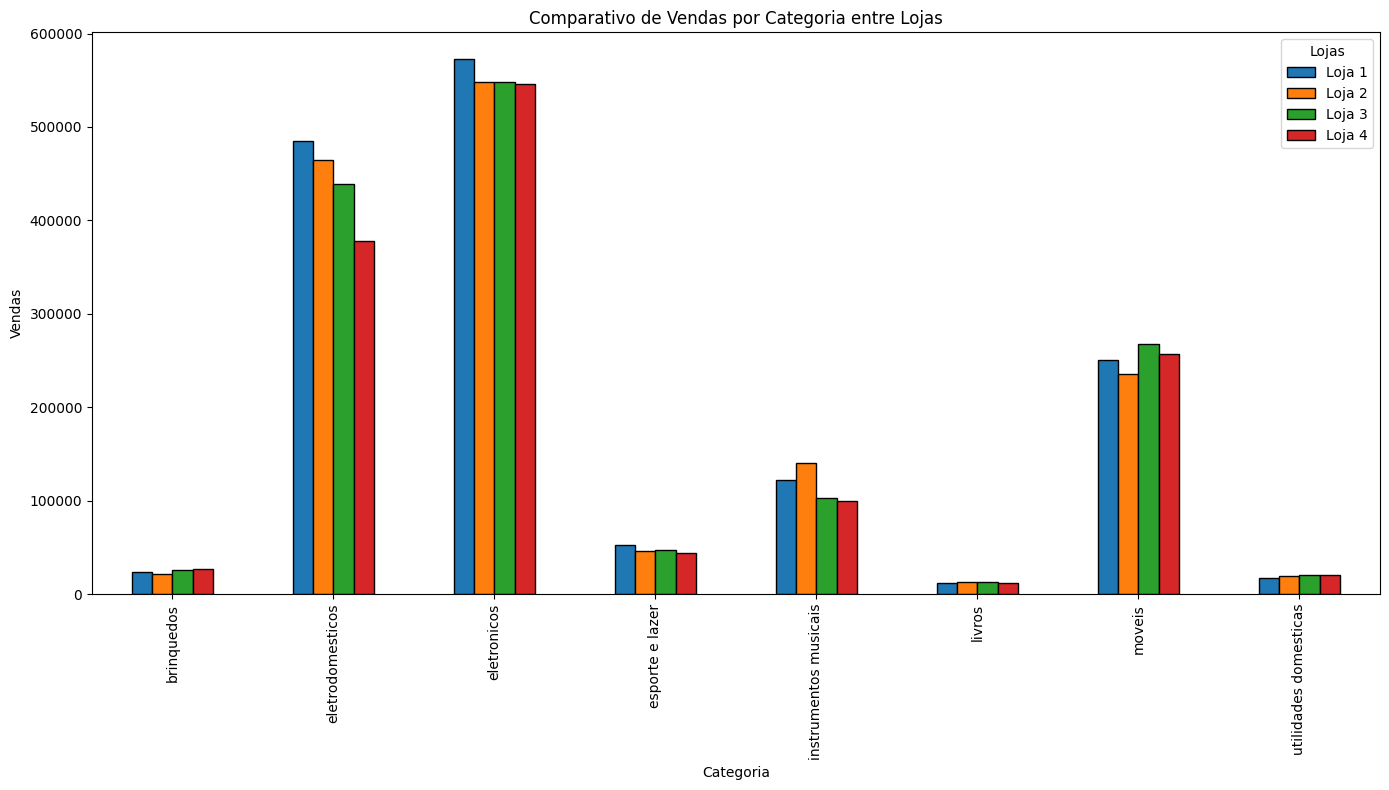

In [87]:
# Gráfico de barras agrupadas
tabela_categorias.plot(
    kind='bar',
    figsize=(14, 8),
    edgecolor='black'
)

plt.title("Comparativo de Vendas por Categoria entre Lojas")
plt.ylabel("Vendas")
plt.xlabel("Categoria")
plt.legend(title="Lojas")
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [88]:
def avaliacao_media(loja):
    return loja['Avaliação da compra'].mean()

avaliacoes = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Avaliação Média': [
        avaliacao_media(loja),
        avaliacao_media(loja2),
        avaliacao_media(loja3),
        avaliacao_media(loja4)
    ]
})

print(avaliacoes)


     Loja  Avaliação Média
0  Loja 1         3.976685
1  Loja 2         4.037304
2  Loja 3         4.048326
3  Loja 4         3.995759


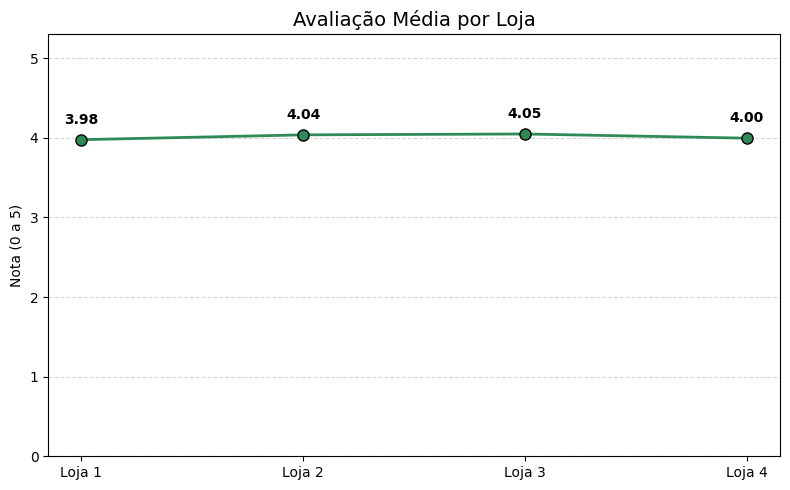

In [100]:
plt.figure(figsize=(8, 5))

# Gráfico de linhas
plt.plot(
    avaliacoes['Loja'],
    avaliacoes['Avaliação Média'],
    marker='o',
    linestyle='-',
    linewidth=2,
    color='seagreen',
    markersize=8,
    markeredgecolor='black'
)

# Personalização
plt.title('Avaliação Média por Loja', fontsize=14)
plt.ylabel('Nota (0 a 5)')
plt.ylim(0, 5.3)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adicionar os valores
for i, nota in enumerate(avaliacoes['Avaliação Média']):
    plt.text(
        i,
        nota + 0.2,
        f"{nota:.2f}",
        ha='center',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [90]:
# Criar uma lista com as variáveis existentes
urls = [url, url2, url3, url4]

df_total = pd.concat(
    [pd.read_csv(url).assign(Loja=f"Loja {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

df_total['Preço'] = df_total['Preço'].astype(float)
df_total['Quantidade de parcelas'] = df_total['Quantidade de parcelas'].astype(int)

df_total['Receita'] = df_total['Preço']

vendas = df_total.groupby(['Loja', 'Produto'])['Receita'].sum().reset_index()

def top_produtos(loja):
    dados = vendas[vendas['Loja'] == loja]

    top_mais_vendidos = dados.sort_values(by='Receita', ascending=False).head(3)
    top_menos_vendidos = dados.sort_values(by='Receita', ascending=True).head(3)

    print(f"\n{loja} - TOP 3 produtos que MAIS dinheiro geraram:")
    for _, linha in top_mais_vendidos.iterrows():
        print(f"  {linha['Produto']} - Receita: R${linha['Receita']:.2f}")

    print(f"\n{loja} - TOP 3 produtos que MENOS dinheiro geraram:")
    for _, linha in top_menos_vendidos.iterrows():
        print(f"  {linha['Produto']} - Receita: R${linha['Receita']:.2f}")

lojas_unicas = vendas['Loja'].unique()

for loja in lojas_unicas:
    top_produtos(loja)


Loja 1 - TOP 3 produtos que MAIS dinheiro geraram:
  TV Led UHD 4K - Receita: R$189534.28
  Geladeira - Receita: R$149524.28
  Celular Plus X42 - Receita: R$130536.40

Loja 1 - TOP 3 produtos que MENOS dinheiro geraram:
  Corda de pular - Receita: R$870.89
  Dinossauro Rex - Receita: R$918.40
  Cubo mágico 8x8 - Receita: R$929.27

Loja 2 - TOP 3 produtos que MAIS dinheiro geraram:
  Celular Plus X42 - Receita: R$150967.83
  TV Led UHD 4K - Receita: R$137833.06
  Geladeira - Receita: R$130176.48

Loja 2 - TOP 3 produtos que MENOS dinheiro geraram:
  Cubo mágico 8x8 - Receita: R$858.22
  Dinossauro Rex - Receita: R$1027.41
  Corda de pular - Receita: R$1142.54

Loja 3 - TOP 3 produtos que MAIS dinheiro geraram:
  Geladeira - Receita: R$133185.99
  TV Led UHD 4K - Receita: R$128892.11
  Celular Plus X42 - Receita: R$124300.84

Loja 3 - TOP 3 produtos que MENOS dinheiro geraram:
  Cubo mágico 8x8 - Receita: R$853.81
  Dinossauro Rex - Receita: R$1060.78
  Corda de pular - Receita: R$1137.

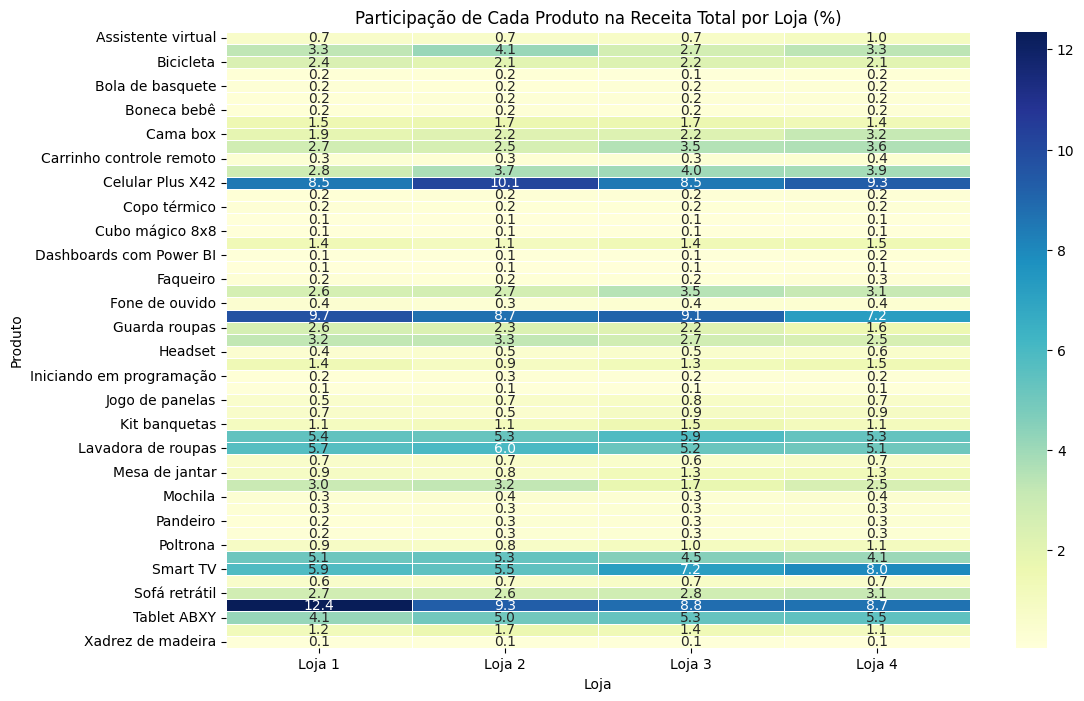

In [95]:
# Criar uma tabela
pivot_table = vendas.pivot_table(index='Produto', columns='Loja', values='Receita', aggfunc='sum')

# Normalizar para porcentagem do total por loja
pivot_pct = pivot_table.div(pivot_table.sum(axis=0), axis=1) * 100

# Plotar
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_pct.fillna(0), cmap='YlGnBu', annot=True, fmt='.1f', linewidths=.5)
plt.title('Participação de Cada Produto na Receita Total por Loja (%)')
plt.xlabel('Loja')
plt.ylabel('Produto')
plt.show()

# 5. Frete Médio por Loja


In [92]:
# Garantir que o custo de envio é numérico
df_total['Frete'] = df_total['Frete'].astype(float)

# Agrupar por loja e calcular a média do custo de envio
envio_medio = df_total.groupby('Loja')['Frete'].mean()

# Mostrar resultados
print("\nEnvio médio por loja:")
for loja, medio in envio_medio.items():
    print(f"{loja}: R${medio:.2f}")


Envio médio por loja:
Loja 1: R$34.69
Loja 2: R$33.62
Loja 3: R$33.07
Loja 4: R$31.28


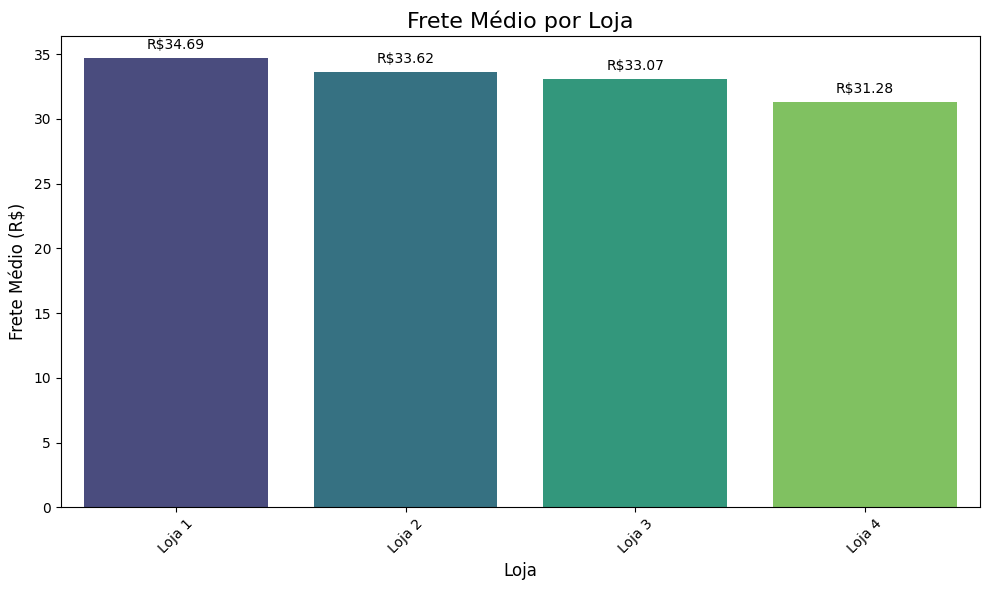

In [99]:
plt.figure(figsize=(10, 6))
sns.barplot(x=envio_medio.index, y=envio_medio.values, palette='viridis', hue=envio_medio.index)

plt.title('Frete Médio por Loja', fontsize=16)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Frete Médio (R$)', fontsize=12)
plt.xticks(rotation=45)

# Adicionar valores
for i, v in enumerate(envio_medio):
    plt.text(i, v + 0.5, f"R${v:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Relatório

É recomendável que o Senhor João venda a a Loja 4, pois é a menos eficiente em todos os critérios-chave: tem o menor faturamento, avaliação média mais baixa (3,99, perdendo para as Lojas 2 e 3) e, embora tenha o frete mais barato (R$31,28), isso não se traduz em vantagem competitiva, já que seus produtos top (como o Celular Plus X42 e a TV Led) geram receitas menores que os mesmos itens nas outras lojas. Além disso, seu desempenho em categorias estratégicas (eletrodomésticos e eletrônicos) é o mais fraco da rede, sem nenhum destaque positivo que justifique sua manutenção. Vender essa unidade liberaria recursos para investir no novo empreendimento.